# The Fairness of Fair Market Rent

*Project Members: Mack McGlenn, Corey Baughman, Aaron Moore, Adriana Nuncio*

## Imports

In [1]:
# imports used in your project go here 

from wrangle import wrangle_data
from explore import (get_disparity_graph, 
                    get_target_hist,
                    get_trend_line_plot,
                    get_difference_by_month_bar,
                    get_avg_diff_6m)
from model import (get_baseline_table,
                  get_models,
                  get_all_models)

## Acquire

*HUD Fair Market Rent (FMR) Acquisiton*
* The HUD FMR data was downloaded as a csv from https://www.huduser.gov/portal/datasets/fmr.html#history.
* When did you get your data?
* What is the size of your data? (columns and rows)
* What does each observation represent?
* What does each column represent?

*Median Market Rent (MMR) Acquisition*
* The MMR data was downloaded from https://www.biggerpockets.com/files/user/leahd42/file/webinar-bonus-2022-rental-data. 
* There were intitial challenges due to the excel file having merged cells. These cells were unmerged and the new spreadsheet was saved as a csv. This process was completed in the spreadsheet and not in the jupyter notebook. Due to this, the csv file is available in the github repository.
* When did you get your data?
* What is the size of your data? (columns and rows)
* What does each observation represent?
* What does each column represent?

In [2]:
# Import acquired messy data from your acquire file here

## Prepare

*HUD FMR Preparation*
* List steps taken to clean your data here
* In particular call out how you handle null values and outliers in detail
* You must do this even if you do not do anything or do not encounter any
* Any time there is potential to make changes to the data you must be upfront about the changes you make or do not make

*MMR Preparation*
* List steps taken to clean your data here
* In particular call out how you handle null values and outliers in detail
* You must do this even if you do not do anything or do not encounter any
* Any time there is potential to make changes to the data you must be upfront about the changes you make or do not make

*HUD FMR and MMR Wrangling*
* The FMR index was converted to datetime
* Both datasets were merged on the datetimeindex
* The FMR column had null values that were replaced with the correct FMR amount
* The MMR column had null values were dropeed because no data was available
* One column was created representing the difference between the MMR column and the FMR column
* Lastly, the dataframe was split using human-based splitting, with the test data contain the last 12 months of the data and the train data containing all data from before that cutoff. 

In [3]:
# wrangling data
df, train, test = wrangle_data()

## Explore

### 1. How have the HUD Fair Market Rent Voucher (FMR) and Median Market Rent (MMR) amounts changed over time?
*Note: Henceforth, the HUD Fair Market will be referred to as FMR.*

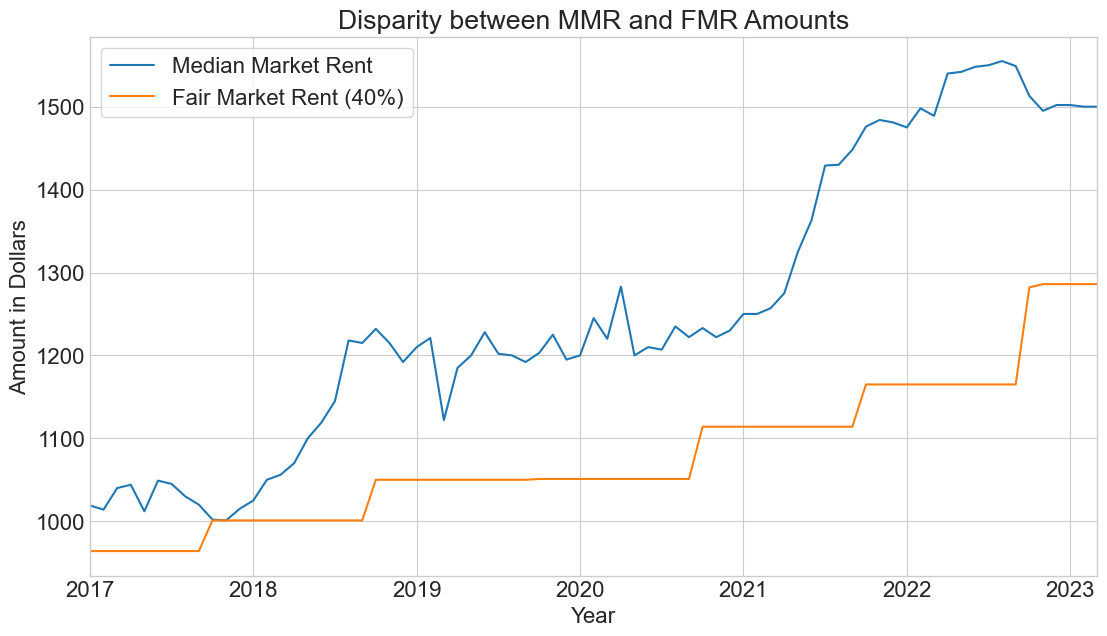

In [4]:
# get visual
get_disparity_graph()

#### Takeaways:
* Since October of 2017, the FMR amount has not been the same as the the MMR. 
* Both increase over time, with MMR having more volaitility.
    * New FMR amounts are applied in October in alginment with the federal fiscal year. No other adjustments are made which is evident in the chart.
* While the FMR adjusts once a yeat, it appears that it is not adjusting fast enough.

### 2. What is the distribution of our the difference between FMR and MMR?

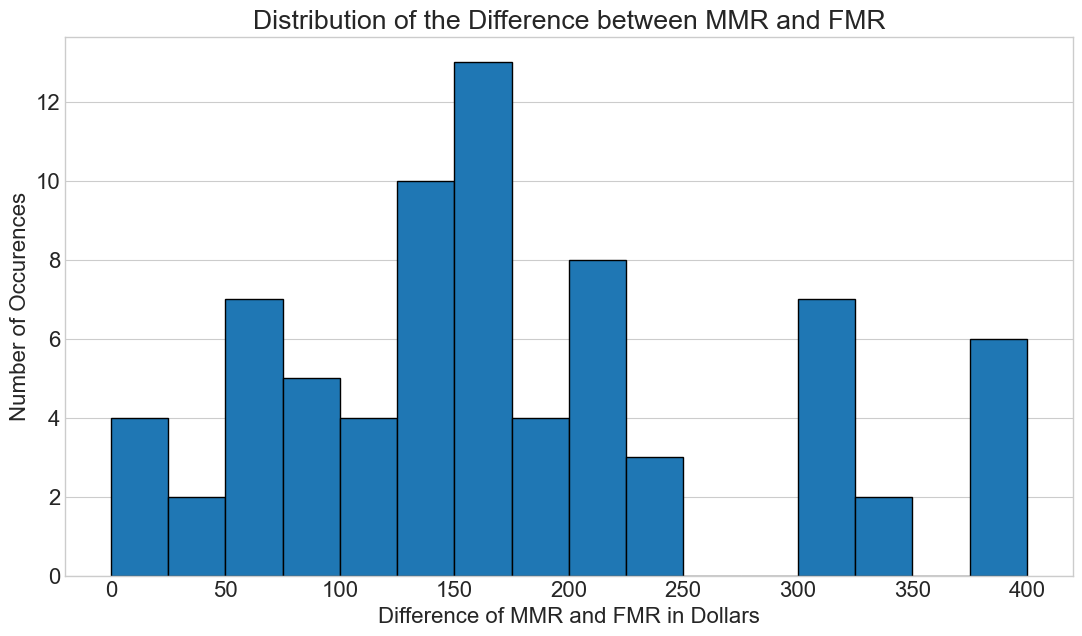

In [5]:
# get visual
get_target_hist()

#### Takeaways:
* The difference is often between \\$125 and \\$175 dollars
* There are many instances where the difference is greater than \\$200. Realistically, individuals who are using FMR vouchers will not have the financial resources to afford that price difference.

### 3. What do the price differences look like over time?

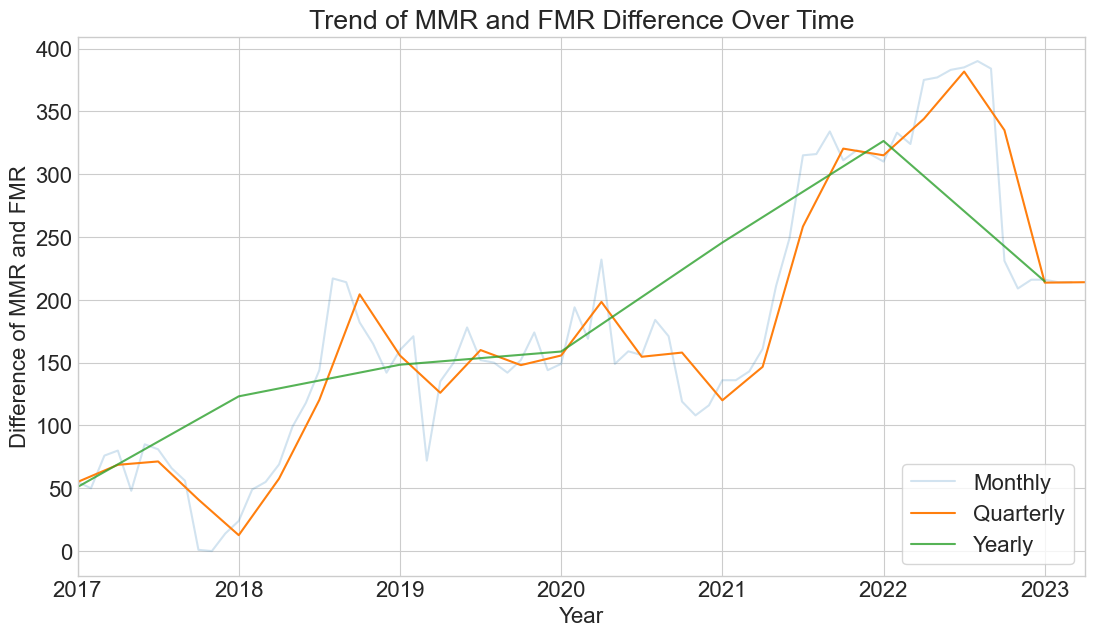

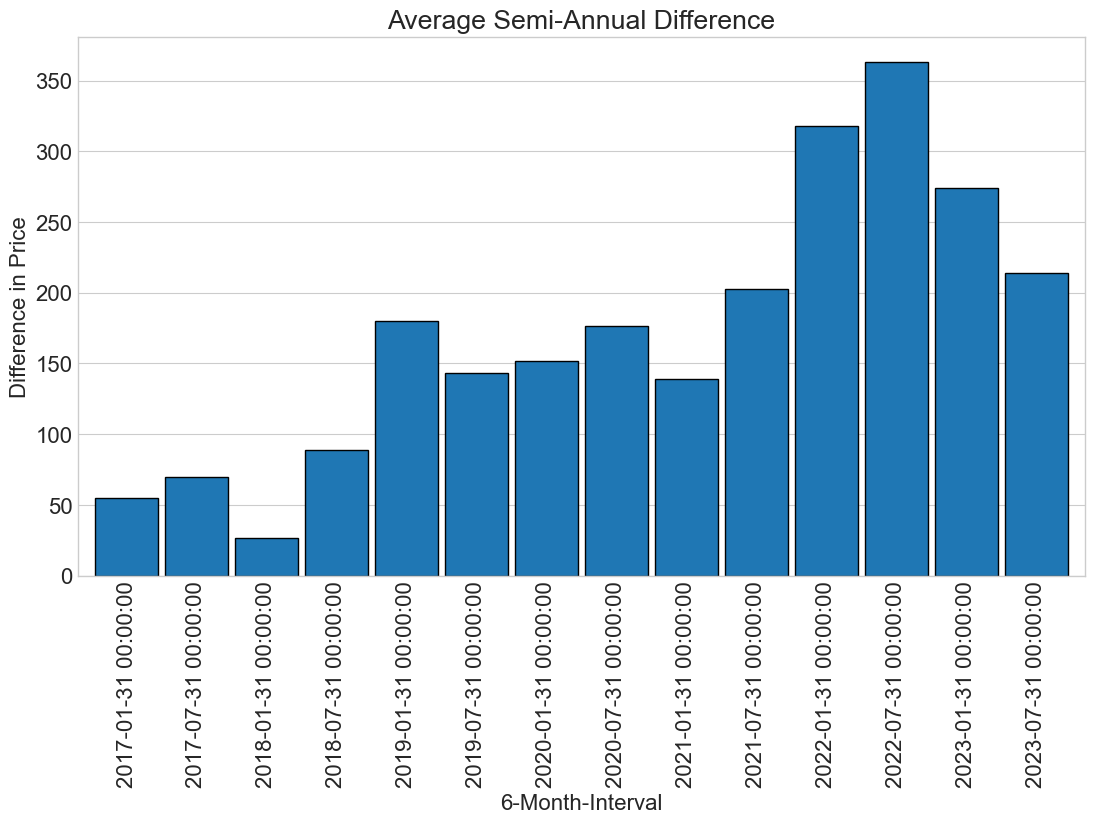

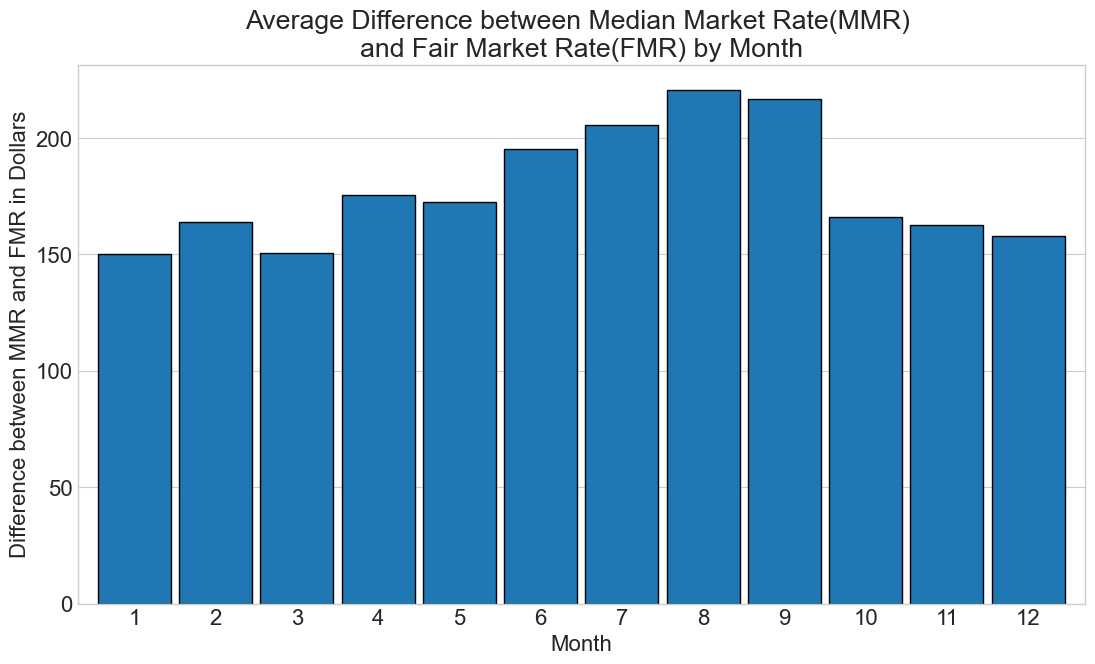

In [6]:
# get visuals
get_trend_line_plot()
get_avg_diff_6m()
get_difference_by_month_bar()

#### Takeaways:
* *Trend of MMR and FMR Difference over time*
    * From 2017 to 2018, there is a small difference between FMR and MMR, with a swift rise in 2018.
    * The FMR adjustments stabilized the difference from 2019 to 2021, but this stabilization did not reduce the difference back to its 2017/18 state. 
    * A sharp increase occurred from 2021 to until October of 2022. This may be a replication of what occured from 2018 to 2020, with the increase followed by stabilization in difference. More time and data is needed to see how the difference continues to change.
* *Average Semi-Annual Difference*
    * This graph supports the findings in the first graph, with an emphasis on the magnitude of the change in difference.
    * The increase in 2021 was more drastic than the increase in 2018. This is likely due to COVID-19 and the rising inflation that came with it. 
* *Average Difference between MMR and FMR by Month*
    * This bar graph presents the volatility of the monthly difference with an aggregated view. 
    * Unsurpisingly, the average difference drops in October, when the FMR adjustments are applied.
    * This indicates from October to March, FMR vouchers will have the most use, but individuals and families using vouchers may not have the liberty of waiting until these prime months to move into housing. 

## Exploration Summary
##### Takeaways:
* There has been a steady increase in the difference between MMR and FMR, with occasioanal decreases in the difference occurring in October, when the FMR voucher amount is adjusted. 
* The best time to use a voucher is between October and March.

##### Features:


## Modeling

### Introduction
* Root Mean Squared Error will be used as the evaluation metric for its applicability to continuous variables/
* While the difference is the target, we will also be modeling and predicting MMR and FMR due to the difference being reliant on both.
* Three baseline models were used, with the 1 month rolling average performing the best, following by the 6 month rolling average as seen below.

In [7]:
# get baseline table
get_baseline_table()

,model_type,target_var,rmse
0,simple_avg,fmr,181.0
1,simple_avg,mmr,322.0
2,simple_avg,diff,170.0
3,simple_avg,percent_diff,13.0
4,1_month_rolling_average,fmr,82.0
5,1_month_rolling_average,mmr,34.0
6,1_month_rolling_average,diff,86.0
7,1_month_rolling_average,percent_diff,8.0
8,6_month_rolling_avg,fmr,88.0
9,6_month_rolling_avg,mmr,51.0


### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

## You may use this as a template for how to introduce your models:

### Model Type

In [8]:
# get models
get_models()

,model_type,target_var,rmse
0,holts_optimized,fmr,63.0
1,holts_optimized,mmr,43.0
2,holts_optimized,diff,101.0
3,holts_optimized,percent_diff,10.0
4,holts_seasonal,fmr,59.0
5,holts_seasonal,mmr,34.0
6,holts_seasonal,diff,98.0
7,holts_seasonal,percent_diff,9.0


### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [9]:
# Code that runs the best overall model on test data (this may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summery
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**

# README

Your README should contain all of the following elements:

* **Title** Gives the name of your project
* **Project Description** Describes what your project is and why it is important 
* **Project Goal** Clearly states what your project sets out to do and how the information gained can be applied to the real world
* **Initial Hypotheses** Initial questions used to focus your project 
* **Project Plan** Guides the reader through the different stages of the pipeline as they relate to your project
* **Data Dictionary** Gives a definition for each of the features used in your report and the units they are measured in, if applicable
* **Steps to Reproduce** Gives instructions for reproducing your work. i.e. Running your notebook on someone else's computer.